In [1]:
import sys
sys.path.append('../../lib/')
from frustration_traditional import *
import numpy as np

In [2]:
L = 20
T = 1
ratio = 0.9

vals = thermalization(L, T, ratio, 0, 10)

In [3]:
N = 1000
ratios = np.linspace(0, 1, N)
Ts = np.linspace(0.1, 3.5, N)

res = transition(L, Ts, ratios, err_runs=10, workers=12)

In [7]:
res

,T,ratio,M,M_std,X,X_std,U
0,0.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667
1,0.1,0.001001,1.000000,0.000000,0.000000,0.000000,0.666667
2,0.1,0.002002,1.000000,0.000000,0.000000,0.000000,0.666667
3,0.1,0.003003,1.000000,0.000000,0.000000,0.000000,0.666667
4,0.1,0.004004,1.000000,0.000000,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...
999995,3.5,0.995996,0.032931,0.000799,0.071967,0.003067,-0.020764
999996,3.5,0.996997,0.032927,0.000633,0.071103,0.003264,0.006145
999997,3.5,0.997998,0.032830,0.000418,0.071355,0.002883,-0.016893
999998,3.5,0.998999,0.032469,0.000649,0.070396,0.002435,-0.010207


In [5]:
U_matrix = np.zeros((N, N))

for i in range(N):
    U_matrix[i, :] = res[res['T'] == Ts[i]]['U']

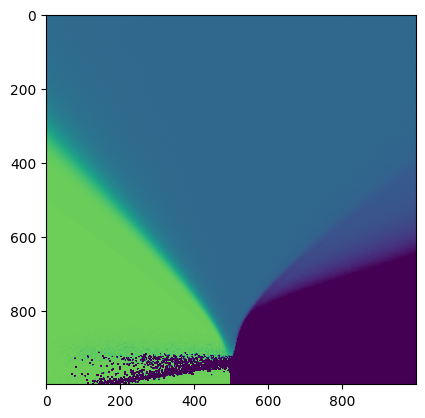

In [11]:
import matplotlib.pyplot as plt

plt.imshow(U_matrix[::-1, :], vmax=1, vmin=-0.5)